## Problem 3

**Auto dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\chinm\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
num = len(auto.mpg) #Total number of elements

print('Length of column is: ',num)
mpg_median = auto.mpg.median() #median of mpg
print('Median of mpg: ',mpg_median)

Length of column is:  397
Median of mpg:  23.0


In [5]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [6]:
num = len(auto.mpg) #Total number of elements

print('Length of column is: ',num)
mpg_median = auto.mpg.median() #median of mpg
print('Median of mpg: ',mpg_median)
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)
auto.head(20)

Length of column is:  392
Median of mpg:  22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,0


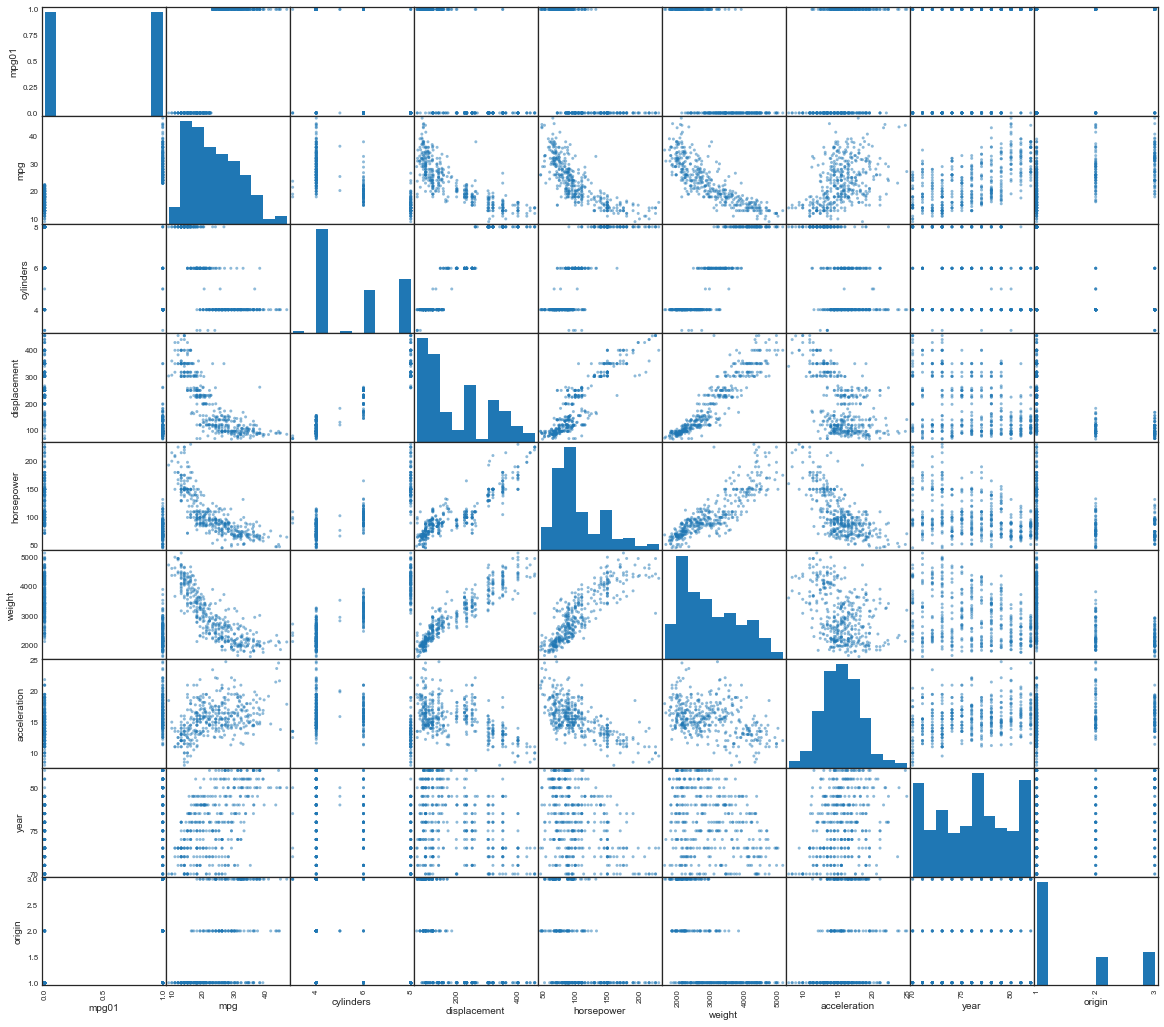

mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["mpg01", "mpg", "cylinders",

"displacement","horsepower","weight","acceleration","year","origin"]

scatter_matrix(auto[attributes], figsize=(20, 18))
plt.show()
corr_matrix = auto.corr()

corr_matrix["mpg01"].sort_values(ascending=False)

In [8]:
corr_matrix = auto.corr()
print(corr_matrix)
corr_matrix["mpg01"].sort_values(ascending=False)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower       -0.689196 -0.416

mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64

### Observation:
According to correlation matrix, the mpg has highest correlation to mpg01. After that parameters like origin, year and acceleration have good correlation. But correlation doesn't define relavance between two variables. We will see the actual realtioships using few more tests as follows.

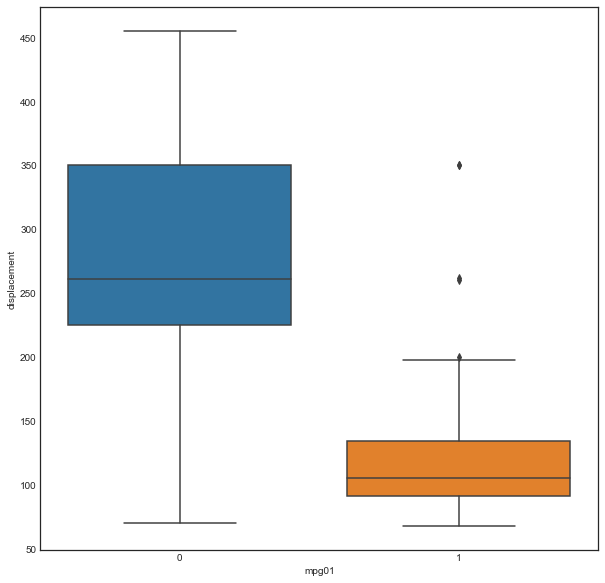

In [43]:
plt.figure(figsize=(10,10))

sns.boxplot('mpg01','displacement', data=auto)
plt.show()

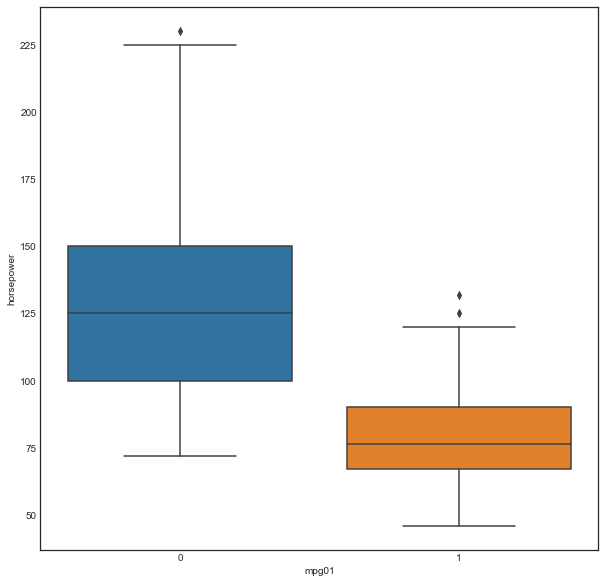

In [44]:
plt.figure(figsize=(10,10))

sns.boxplot('mpg01','horsepower', data=auto)
plt.show()

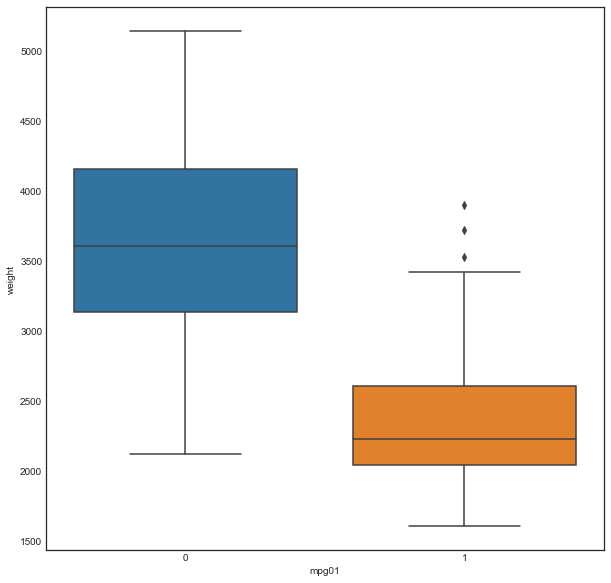

In [45]:
plt.figure(figsize=(10,10))

sns.boxplot('mpg01','weight', data=auto)
plt.show()

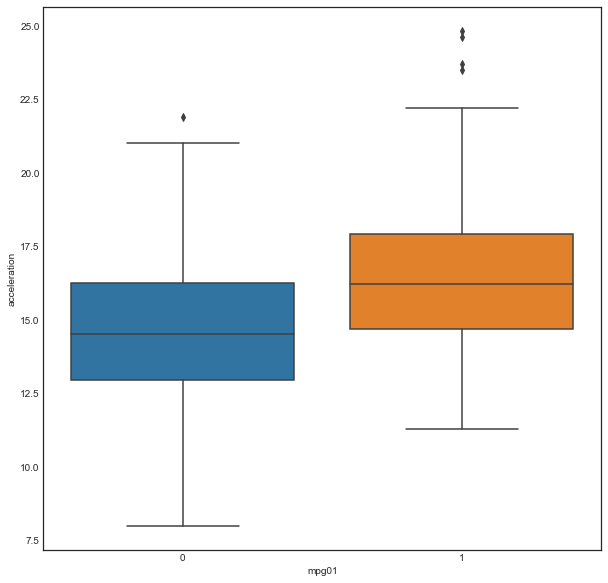

In [46]:
plt.figure(figsize=(10,10))

sns.boxplot('mpg01','acceleration', data=auto)
plt.show()

The box plot of acceleration matches mpg01. So that we can say that acceleration is very relevant when it comes to miles per gallon consumption.

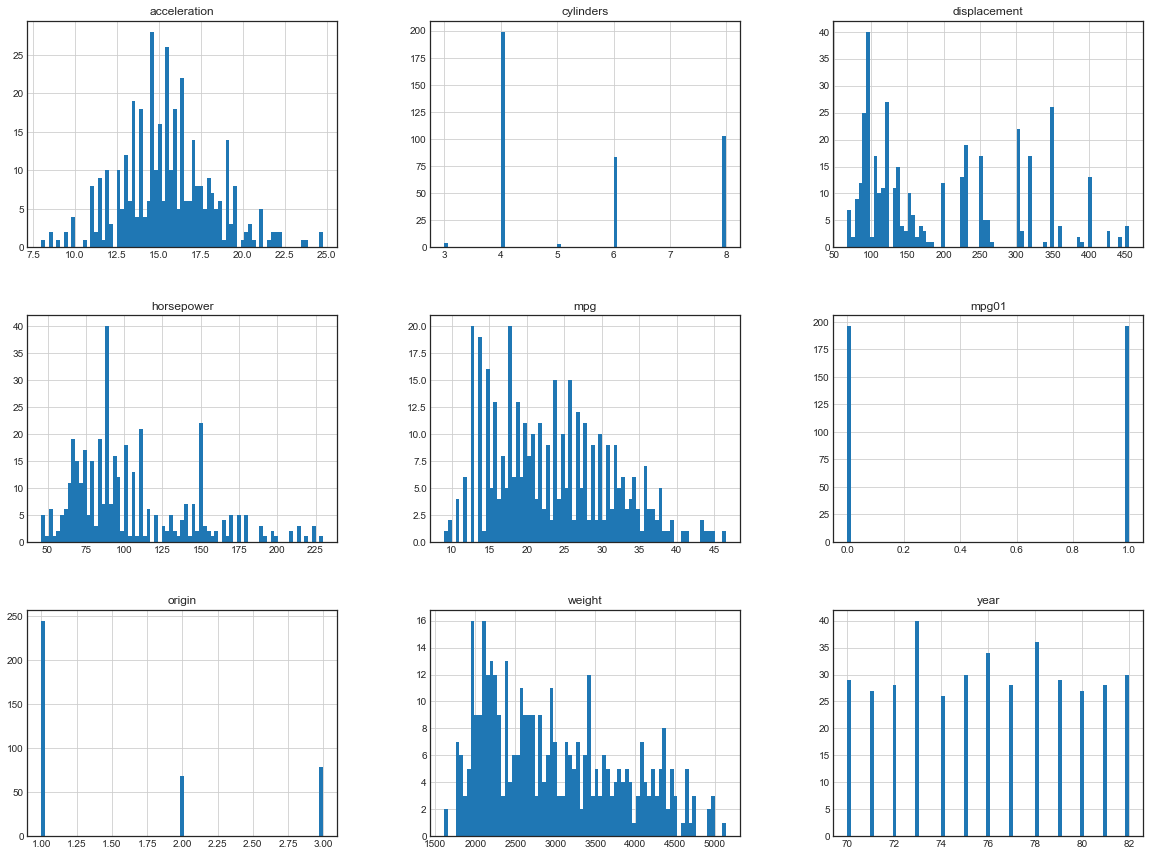

In [47]:
import matplotlib.pyplot as plt
auto.hist(bins=75, figsize=(20,15))
plt.show()

In [48]:
#split training and test set data

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(auto, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

313
79


In [49]:
from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [50]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## LDA

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [52]:


X = auto[['weight', 'displacement', 'horsepower', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.91836734693877553

## QDA

In [53]:


X = auto[['weight', 'displacement', 'horsepower', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.94897959183673475

In [54]:
from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [55]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LogisticRegression()
lr.fit(X_train, y_train)
#lr.fit(X_test, y_test).score(X_test, y_test)
accuracy_score(y_test, lr.predict(X_test))

0.96938775510204078

## KNN

In [56]:


def KNN(n_neighbors=1, weights='uniform'):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    return(pred, score, clf.classes_)

def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()

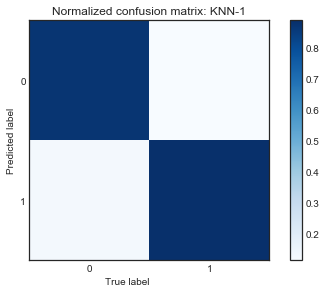

True        0   1
Predicted        
0          47   5
1           7  39
   Precision
0   0.903846
1   0.847826


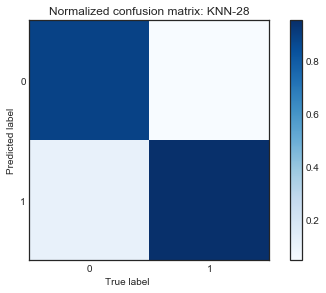

True        0   1
Predicted        
0          48   2
1           6  42
   Precision
0      0.960
1      0.875


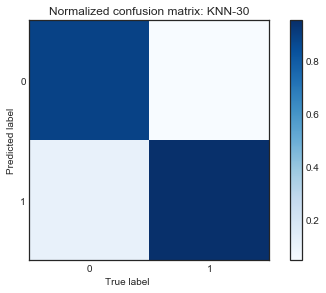

True        0   1
Predicted        
0          48   2
1           6  42
   Precision
0      0.960
1      0.875


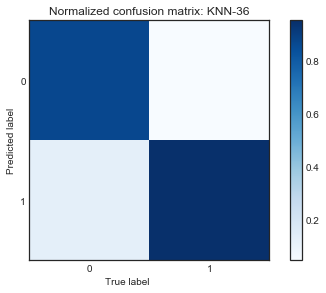

True        0   1
Predicted        
0          47   2
1           7  42
   Precision
0   0.959184
1   0.857143


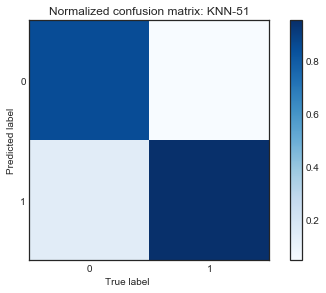

True        0   1
Predicted        
0          46   2
1           8  42
   Precision
0   0.958333
1   0.840000


In [57]:
for i in [1,28,30, 36,51]:
    pred, score, classes = KNN(i)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized.T, classes, n_neighbors=i)
    cm_df = pd.DataFrame(cm.T, index=classes, columns=classes)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)    
    print(pd.DataFrame(precision_score(y_test, pred, average=None),
                       index=classes, columns=['Precision']))  

### Observations: 
Here we see the expected behaviour of KNN as the number of neighbour increases and matches true input attributes, the decision boundry becomes a good fit and we get nice precision. So we can observe here that for 28 & 30 neighbours we get 96% precision with more accurate prediction. If we increase number of neighbours even further, then we see the model tries to overfit to noise and errors. This causes inaccurate prediction and precision decreases.